In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
my_face=list()
for img in glob.glob('/content/drive/MyDrive/TL/*.jpg'):
  my_face.append(img_to_array(load_img(img,target_size=(150,150))))
orther_face=list()
for img in glob.glob('/content/drive/MyDrive/other/*.jpg'):
  orther_face.append(img_to_array(load_img(img,target_size=(150,150))))

In [ ]:
input_dataset = np.array(my_face+orther_face)
label_dataset = np.array([0]*len(my_face) + [1]*len(orther_face) )

In [ ]:
input_dataset.shape

(90, 150, 150, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.8, test_size=0.2, random_state= 0)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [ ]:
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [ ]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(2,activation = 'softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train,y_train,epochs=20,batch_size = 64,validation_data=(x_test,y_test), verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 11s 2s/step - loss: 1.4445 - accuracy: 0.4583 - val_loss: 1.0711 - val_accuracy: 0.2222
Epoch 2/20
2/2 [==============================] - 11s 2s/step - loss: 0.9338 - accuracy: 0.3611 - val_loss: 0.4979 - val_accuracy: 0.7778
Epoch 3/20
2/2 [==============================] - 11s 2s/step - loss: 0.5907 - accuracy: 0.6528 - val_loss: 0.7005 - val_accuracy: 0.7778
Epoch 4/20
2/2 [==============================] - 11s 2s/step - loss: 1.0401 - accuracy: 0.6389 - val_loss: 0.6901 - val_accuracy: 0.2222
Epoch 5/20
2/2 [==============================] - 11s 2s/step - loss: 0.6286 - accuracy: 0.4306 - val_loss: 0.3910 - val_accuracy: 0.7778
Epoch 6/20
2/2 [==============================] - 11s 2s/step - loss: 0.5138 - accuracy: 0.6389 - val_loss: 0.3081 - val_accuracy: 0.7778
Epoch 7/20
2/2 [==============================] - 11s 2s/step - loss: 0.4015 - accuracy: 0.7083 - val_loss: 1.2449 - val_accuracy: 0.2222
Epoch 8/20
2/2 [=============================

In [ ]:
score = Model.evaluate(x_test,y_test,verbose = 1)

1/1 [==============================] - 1s 641ms/step - loss: 0.0000e+00 - accuracy: 1.0000


me


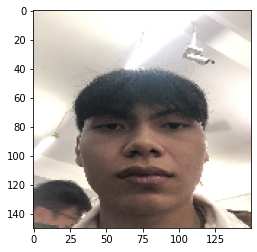

In [ ]:
y_label = ['me','not me']
img = load_img('3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])

not me


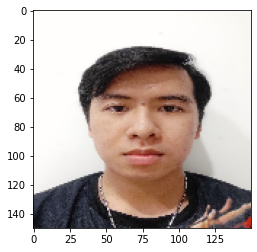

In [ ]:
y_label = ['me','not me']
img = load_img('2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(y_label[np.argmax(Model.predict(img),axis = 1)[0]])